<a href="https://colab.research.google.com/github/saritsauer/WallStreetBets/blob/main/Single_cell_analysis_model_training_testing_and_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author information:
Yoel Goldstein, Lab of Prof. Ofra Benny
Hebrew University, School of Pharmacy

This code uses FACS data to evaluate the ability to classify between cancer call population with different phenotypes at the single cell level.

The code is generic and can be used for all cell lines. The current code uses H460 cell types as en example.

Once the models are trained they are saved as a pickle.

Code description:
*   Requires file directory pointing to a folder containing raw .csv files
*   Includes preprocessing of the raw data: cleaning, log transformation, and normalization.  
*   Three datasets are analyzed: only cell size(FSC) and granularity(SSC) parameter, only particle uptake parameters, and all the parameters combined.  
*   The code includes Random forest, XGBoost and SVM classifiers and study their performance in classifying between two cell subpopulations.
*   Unseen data as a second blind test (Batch data)
*   PCA based dimeention reduction and its effect on the performances
*   Statistical analysis (t-test between models)
*   ROC curve and AUC analysis





In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=b15411a191b668e5b720913aa2802bbb0fa5bbeff5d3aaa523c4061959c46bba
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
#import FlowCal
import pandas as pd
import numpy as np
import eli5
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from pathlib import Path
from pandas import DataFrame
from pylab import *
from google.colab import drive
from collections import Counter
from functools import reduce
from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RandomizedSearchCV


scaler = MinMaxScaler()
sns.set_style('white')

In [ ]:
drive.mount('/content/drive')

data_path = r'' # enter the path where the data stored in

# H460 csv files
df_1_H460 = pd.read_csv(data_path +'H460_1.csv')
df_2_H460 = pd.read_csv(data_path +'H460_2.csv')
df_3_H460 = pd.read_csv(data_path +'H460_3.csv')
df_4_H460 = pd.read_csv(data_path +'H460_4.csv')
df_5_H460 = pd.read_csv(data_path +'H460_5.csv')
df_6_H460 = pd.read_csv(data_path +'H460_6.csv')
df_7_H460 = pd.read_csv(data_path +'H460_7.csv')
df_8_H460 = pd.read_csv(data_path +'H460_8.csv')
df_9_H460 = pd.read_csv(data_path +'H460_9.csv')
df_10_H460 = pd.read_csv(data_path +'H460_10.csv')
df_11_H460 = pd.read_csv(data_path +'H460_11.csv')
df_12_H460 = pd.read_csv(data_path +'H460_12.csv')
df_13_H460 = pd.read_csv(data_path +'H460_13.csv')
df_14_H460 = pd.read_csv(data_path +'H460_14.csv')
df_15_H460 = pd.read_csv(data_path +'H460_15.csv')
df_16_H460 = pd.read_csv(data_path +'H460_16.csv')
df_17_H460 = pd.read_csv(data_path +'H460_17.csv')
df_18_H460 = pd.read_csv(data_path +'H460_18.csv')
df_19_H460 = pd.read_csv(data_path +'H460_19.csv')
df_20_H460 = pd.read_csv(data_path +'H460_20.csv')

# H460 cis-res csv files
df_1_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_1.csv')
df_2_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_2.csv')
df_3_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_3.csv')
df_4_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_4.csv')
df_5_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_5.csv')
df_6_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_6.csv')
df_7_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_7.csv')
df_8_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_8.csv')
df_9_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_9.csv')
df_10_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_10.csv')
df_11_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_11.csv')
df_12_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_12.csv')
df_13_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_13.csv')
df_14_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_14.csv')
df_15_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_15.csv')
df_16_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_16.csv')
df_17_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_17.csv')
df_18_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_18.csv')
df_19_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_19.csv')
df_20_H460_cis_res = pd.read_csv(data_path +'H460_cis_res_20.csv')

# H460 csv Batch files
Total_H460_batch_log_single = pd.read_csv(data_path +'Total_H460_test_log_single.csv')
Total_H460_cis_res_batch_log_single = pd.read_csv(data_path +'Total_H460_cis_res_test_log_single.csv')

Mounted at /content/drive


In [ ]:
# building a function for normalizing the uptake data, by using the 5 intencities and the cell area
def normalized_intencity_single (intensity_1, intensity_2, intensity_3, intensity_4, intensity_5, norm):
    return pd.Series([intensity_1/norm, intensity_2/norm, intensity_3/norm, intensity_4/norm, intensity_5/norm])

In [ ]:
# This function creates a heatmap for the models results.
def heatconmat(y_true,y_pred):
    sns.set_context('talk')
    plt.figure(figsize=(9,6))
    sns.heatmap(confusion_matrix(y_true,y_pred),
                annot=True,
                fmt='d',
                cbar=False,
                cmap='gist_earth_r',
                yticklabels=sorted(y_true.unique()))
    plt.show()
    print(classification_report(y_true,y_pred))

In [ ]:
# displaying the training and the validation results
def display_classification_results(classifier, X_train, y_train, x_val, y_val):
    print('Classifier: {0:s}\nParameters:'.format(classifier.__class__.__name__))
    for k,v in classifier.get_params().items():
        print('\t{0} : {1}'.format(k,v))
    training_set_score = classifier.score(X_train,y_train)
    print('Testing on TRAINING set: {}'.format(training_set_score))
    val_set_score = classifier.score(x_val,y_val)
    print('Validation on VALIDATION set: {}'.format(val_set_score))
    return (training_set_score,val_set_score)

Preparation of data.
This step includs:
1. data cleaning - based on the preliminary analysis of the raw data we filter out debris and duoblets from the data.
2. spliting the data into training and testing datasets
3. grouping the individual datasets into one dataset
4. renaming the features
5. log transformation of the data
6. normalizing the data using the cell area
7. replacing inf values to zeros


Training and testing datasets

In [ ]:
# Cleaning the H460 data based on a preliminary analysis

df_1_H460 = df_1_H460[df_1_H460['SSC-W']< 135000]
df_1_H460 = df_1_H460[df_1_H460['SSC-W']> 70000]
df_1_H460 = df_1_H460[df_1_H460['SSC-A']> 10000]

df_2_H460 = df_2_H460[df_2_H460['SSC-W']< 135000]
df_2_H460 = df_2_H460[df_2_H460['SSC-W']> 70000]
df_2_H460 = df_2_H460[df_2_H460['SSC-A']> 10000]

df_3_H460 = df_3_H460[df_3_H460['SSC-W']< 135000]
df_3_H460 = df_3_H460[df_3_H460['SSC-W']> 70000]
df_3_H460 = df_3_H460[df_3_H460['SSC-A']> 10000]

df_4_H460 = df_4_H460[df_4_H460['SSC-W']< 135000]
df_4_H460 = df_4_H460[df_4_H460['SSC-W']> 70000]
df_4_H460 = df_4_H460[df_4_H460['SSC-A']> 10000]

df_5_H460 = df_5_H460[df_5_H460['SSC-W']< 135000]
df_5_H460 = df_5_H460[df_5_H460['SSC-W']> 70000]
df_5_H460 = df_5_H460[df_5_H460['SSC-A']> 10000]

df_6_H460 = df_6_H460[df_6_H460['SSC-W']< 135000]
df_6_H460 = df_6_H460[df_6_H460['SSC-W']> 70000]
df_6_H460 = df_6_H460[df_6_H460['SSC-A']> 10000]

df_7_H460 = df_7_H460[df_7_H460['SSC-W']< 135000]
df_7_H460 = df_7_H460[df_7_H460['SSC-W']> 70000]
df_7_H460 = df_7_H460[df_7_H460['SSC-A']> 10000]

df_8_H460 = df_8_H460[df_8_H460['SSC-W']< 135000]
df_8_H460 = df_8_H460[df_8_H460['SSC-W']> 70000]
df_8_H460 = df_8_H460[df_8_H460['SSC-A']> 10000]

df_9_H460 = df_9_H460[df_9_H460['SSC-W']< 135000]
df_9_H460 = df_9_H460[df_9_H460['SSC-W']> 70000]
df_9_H460 = df_9_H460[df_9_H460['SSC-A']> 10000]

df_10_H460 = df_10_H460[df_10_H460['SSC-W']< 135000]
df_10_H460 = df_10_H460[df_10_H460['SSC-W']> 70000]
df_10_H460 = df_10_H460[df_10_H460['SSC-A']> 10000]

df_11_H460 = df_11_H460[df_11_H460['SSC-W']< 135000]
df_11_H460 = df_11_H460[df_11_H460['SSC-W']> 70000]
df_11_H460 = df_11_H460[df_11_H460['SSC-A']> 10000]

df_12_H460 = df_12_H460[df_12_H460['SSC-W']< 135000]
df_12_H460 = df_12_H460[df_12_H460['SSC-W']> 70000]
df_12_H460 = df_12_H460[df_12_H460['SSC-A']> 10000]

df_13_H460 = df_13_H460[df_13_H460['SSC-W']< 135000]
df_13_H460 = df_13_H460[df_13_H460['SSC-W']> 70000]
df_13_H460 = df_13_H460[df_13_H460['SSC-A']> 10000]

df_14_H460 = df_14_H460[df_14_H460['SSC-W']< 135000]
df_14_H460 = df_14_H460[df_14_H460['SSC-W']> 70000]
df_14_H460 = df_14_H460[df_14_H460['SSC-A']> 10000]

df_15_H460 = df_15_H460[df_15_H460['SSC-W']< 135000]
df_15_H460 = df_15_H460[df_15_H460['SSC-W']> 70000]
df_15_H460 = df_15_H460[df_15_H460['SSC-A']> 10000]

df_16_H460 = df_16_H460[df_16_H460['SSC-W']< 135000]
df_16_H460 = df_16_H460[df_16_H460['SSC-W']> 70000]
df_16_H460 = df_16_H460[df_16_H460['SSC-A']> 10000]

df_17_H460 = df_17_H460[df_17_H460['SSC-W']< 135000]
df_17_H460 = df_17_H460[df_17_H460['SSC-W']> 70000]
df_17_H460 = df_17_H460[df_17_H460['SSC-A']> 10000]

df_18_H460 = df_18_H460[df_18_H460['SSC-W']< 135000]
df_18_H460 = df_18_H460[df_18_H460['SSC-W']> 70000]
df_18_H460 = df_18_H460[df_18_H460['SSC-A']> 10000]

df_19_H460 = df_19_H460[df_19_H460['SSC-W']< 135000]
df_19_H460 = df_19_H460[df_19_H460['SSC-W']> 70000]
df_19_H460 = df_19_H460[df_19_H460['SSC-A']> 10000]

df_20_H460 = df_20_H460[df_20_H460['SSC-W']< 135000]
df_20_H460 = df_20_H460[df_20_H460['SSC-W']> 70000]
df_20_H460 = df_20_H460[df_20_H460['SSC-A']> 10000]


In [ ]:
# asigning H460 training and testing datasets

# list pop 1 training dfs
df_list_pop_1_train = [df_1_H460, df_2_H460, df_3_H460, df_4_H460, df_5_H460,
          df_6_H460, df_7_H460, df_8_H460, df_9_H460, df_10_H460,
          df_1_H460, df_12_H460, df_13_H460, df_14_H460, df_15_H460]

group = 1

for df in df_list_pop_1_train:
    df['group'] = group
    group += 1

# list pop 1 testing dfs
df_list_pop_1_test = [df_16_H460, df_17_H460, df_18_H460, df_19_H460, df_20_H460]

In [ ]:
# Cleaning the H460 cis-res data based on a preliminary analysis

df_1_H460_cis_res = df_1_H460_cis_res[df_1_H460_cis_res['SSC-W'] > 75000]
df_1_H460_cis_res = df_1_H460_cis_res[df_1_H460_cis_res['SSC-A']> 25000]

df_2_H460_cis_res = df_2_H460_cis_res[df_2_H460_cis_res['SSC-W'] > 75000]
df_2_H460_cis_res = df_2_H460_cis_res[df_2_H460_cis_res['SSC-A']> 25000]

df_3_H460_cis_res = df_3_H460_cis_res[df_3_H460_cis_res['SSC-W'] > 75000]
df_3_H460_cis_res = df_3_H460_cis_res[df_3_H460_cis_res['SSC-A']> 25000]

df_4_H460_cis_res = df_4_H460_cis_res[df_4_H460_cis_res['SSC-W'] > 75000]
df_4_H460_cis_res = df_4_H460_cis_res[df_4_H460_cis_res['SSC-A']> 25000]

df_5_H460_cis_res = df_5_H460_cis_res[df_5_H460_cis_res['SSC-W'] > 75000]
df_5_H460_cis_res = df_5_H460_cis_res[df_5_H460_cis_res['SSC-A']> 25000]

df_6_H460_cis_res = df_6_H460_cis_res[df_6_H460_cis_res['SSC-W'] > 75000]
df_6_H460_cis_res = df_6_H460_cis_res[df_6_H460_cis_res['SSC-A']> 25000]

df_7_H460_cis_res = df_7_H460_cis_res[df_7_H460_cis_res['SSC-W'] > 75000]
df_7_H460_cis_res = df_7_H460_cis_res[df_7_H460_cis_res['SSC-A']> 25000]

df_8_H460_cis_res = df_8_H460_cis_res[df_8_H460_cis_res['SSC-W'] > 75000]
df_8_H460_cis_res = df_8_H460_cis_res[df_8_H460_cis_res['SSC-A']> 25000]

df_9_H460_cis_res = df_9_H460_cis_res[df_9_H460_cis_res['SSC-W'] > 75000]
df_9_H460_cis_res = df_9_H460_cis_res[df_9_H460_cis_res['SSC-A']> 25000]

df_10_H460_cis_res = df_10_H460_cis_res[df_10_H460_cis_res['SSC-W'] > 75000]
df_10_H460_cis_res = df_10_H460_cis_res[df_10_H460_cis_res['SSC-A']> 25000]

df_11_H460_cis_res = df_11_H460_cis_res[df_11_H460_cis_res['SSC-W'] > 75000]
df_11_H460_cis_res = df_11_H460_cis_res[df_11_H460_cis_res['SSC-A']> 25000]

df_12_H460_cis_res = df_12_H460_cis_res[df_12_H460_cis_res['SSC-W'] > 75000]
df_12_H460_cis_res = df_12_H460_cis_res[df_12_H460_cis_res['SSC-A']> 25000]

df_13_H460_cis_res = df_13_H460_cis_res[df_13_H460_cis_res['SSC-W'] > 75000]
df_13_H460_cis_res = df_13_H460_cis_res[df_13_H460_cis_res['SSC-A']> 25000]

df_14_H460_cis_res = df_14_H460_cis_res[df_14_H460_cis_res['SSC-W'] > 75000]
df_14_H460_cis_res = df_14_H460_cis_res[df_14_H460_cis_res['SSC-A']> 25000]

df_15_H460_cis_res = df_15_H460_cis_res[df_15_H460_cis_res['SSC-W'] > 75000]
df_15_H460_cis_res = df_15_H460_cis_res[df_15_H460_cis_res['SSC-A']> 25000]

df_16_H460_cis_res = df_16_H460_cis_res[df_16_H460_cis_res['SSC-W'] > 75000]
df_16_H460_cis_res = df_16_H460_cis_res[df_16_H460_cis_res['SSC-A']> 25000]

df_17_H460_cis_res = df_17_H460_cis_res[df_17_H460_cis_res['SSC-W'] > 75000]
df_17_H460_cis_res = df_17_H460_cis_res[df_17_H460_cis_res['SSC-A']> 25000]

df_18_H460_cis_res = df_18_H460_cis_res[df_18_H460_cis_res['SSC-W'] > 75000]
df_18_H460_cis_res = df_18_H460_cis_res[df_18_H460_cis_res['SSC-A']> 25000]

df_19_H460_cis_res = df_19_H460_cis_res[df_19_H460_cis_res['SSC-W'] > 75000]
df_19_H460_cis_res = df_19_H460_cis_res[df_19_H460_cis_res['SSC-A']> 25000]

df_20_H460_cis_res = df_20_H460_cis_res[df_20_H460_cis_res['SSC-W'] > 75000]
df_20_H460_cis_res = df_20_H460_cis_res[df_20_H460_cis_res['SSC-A']> 25000]

In [ ]:
# asigning H460 training and testing datasets

# list pop 1 training dfs
df_list_pop_2_train = [df_1_H460_cis_res, df_2_H460_cis_res, df_3_H460_cis_res, df_4_H460_cis_res, df_5_H460_cis_res,
          df_6_H460_cis_res, df_7_H460_cis_res, df_8_H460_cis_res, df_9_H460_cis_res, df_10_H460_cis_res,
          df_11_H460_cis_res, df_12_H460_cis_res, df_13_H460_cis_res, df_14_H460_cis_res, df_15_H460_cis_res]

for df in df_list_pop_2_train:
    df['group'] = group
    group += 1

# list pop 2 testing dfs
df_list_pop_2_test = [df_16_H460_cis_res, df_17_H460_cis_res, df_18_H460_cis_res, df_19_H460_cis_res, df_20_H460_cis_res]

In [ ]:
# merging the datasets into one dataset of training and one dataset of testing for both cell lines

# merged df train pop 1
Total_pop_1_train = pd.DataFrame()
for df in df_list_pop_1_train:
    Total_pop_1_train =  pd.concat([Total_pop_1_train, df], ignore_index=True)

# merged df test pop 1
Total_pop_1_test = pd.DataFrame()
for df in df_list_pop_1_test:
    Total_pop_1_test =  pd.concat([Total_pop_1_test, df], ignore_index=True)


# merged df train pop 2
Total_pop_2_train = pd.DataFrame()
for df in df_list_pop_2_train:
    Total_pop_2_train =  pd.concat([Total_pop_2_train, df], ignore_index=True)

# merged df test pop 2
Total_pop_2_test = pd.DataFrame()
for df in df_list_pop_2_test:
    Total_pop_2_test =  pd.concat([Total_pop_2_test, df], ignore_index=True)


In [ ]:
# features renaming

# renaming train pop 1
Total_pop_1_train.drop(['Unnamed: 0','Time'], axis = 1, inplace = True)
Total_pop_1_train.rename(columns={"FSC-A": "FSC_A", "FSC-H": "FSC_H", "FSC-W": "FSC_W", "SSC-A": "SSC_A",
                                  "SSC-H": "SSC_H", "SSC-W": "SSC_W", "BV421-A": "BV421_A", "FITC-A": "FITC_A",
                                  "PerCP-A": "PerCP_A", "PE-Texas Red-A": "PE_Texas_Red_A", "BV421-A": "BV421_A",
                                   "Alexa Fluor 700-A": "Alexa_Fluor_700_A"}, inplace = True)

# renaming test pop 1
Total_pop_1_test.drop(['Unnamed: 0','Time'], axis = 1, inplace = True)
Total_pop_1_test.rename(columns={"FSC-A": "FSC_A", "FSC-H": "FSC_H", "FSC-W": "FSC_W", "SSC-A": "SSC_A",
                                  "SSC-H": "SSC_H", "SSC-W": "SSC_W", "BV421-A": "BV421_A", "FITC-A": "FITC_A",
                                  "PerCP-A": "PerCP_A", "PE-Texas Red-A": "PE_Texas_Red_A", "BV421-A": "BV421_A",
                                   "Alexa Fluor 700-A": "Alexa_Fluor_700_A"}, inplace = True)


# renaming train pop 2
Total_pop_2_train.drop(['Unnamed: 0','Time'], axis = 1, inplace = True)
Total_pop_2_train.rename(columns={"FSC-A": "FSC_A", "FSC-H": "FSC_H", "FSC-W": "FSC_W", "SSC-A": "SSC_A",
                                  "SSC-H": "SSC_H", "SSC-W": "SSC_W", "BV421-A": "BV421_A", "FITC-A": "FITC_A",
                                  "PerCP-A": "PerCP_A", "PE-Texas Red-A": "PE_Texas_Red_A", "BV421-A": "BV421_A",
                                   "Alexa Fluor 700-A": "Alexa_Fluor_700_A"}, inplace = True)

# renaming test pop 2
Total_pop_2_test.drop(['Unnamed: 0','Time'], axis = 1, inplace = True)
Total_pop_2_test.rename(columns={"FSC-A": "FSC_A", "FSC-H": "FSC_H", "FSC-W": "FSC_W", "SSC-A": "SSC_A",
                                  "SSC-H": "SSC_H", "SSC-W": "SSC_W", "BV421-A": "BV421_A", "FITC-A": "FITC_A",
                                  "PerCP-A": "PerCP_A", "PE-Texas Red-A": "PE_Texas_Red_A", "BV421-A": "BV421_A",
                                   "Alexa Fluor 700-A": "Alexa_Fluor_700_A"}, inplace = True)

In [ ]:
# log transformation of the H460 datasets

# log transformation train pop 1
Total_pop_1_log = Total_pop_1_train.transform(log, channels=['FSC_A','FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W', 'BV421_A', 'FITC_A','PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A'], b=500.0, inplace = True)
Total_pop_1_log.replace([np.inf, -np.inf], np.nan, inplace = True)
Total_pop_1_log = Total_pop_1_log.fillna(0)
Total_pop_1_log['Cell_line'] = 0
Total_pop_1_log.reset_index(inplace = True)
Total_pop_1_log['group'] = Total_pop_1_train['group']
prefeatured_pop_1 = Total_pop_1_log

# log transformation test pop 1
Total_pop_1_test_log = Total_pop_1_test.transform(log, channels=['FSC_A','FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W', 'BV421_A', 'FITC_A','PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A'], b=500.0, inplace = True)
Total_pop_1_test_log.replace([np.inf, -np.inf], np.nan, inplace = True)
Total_pop_1_test_log = Total_pop_1_test_log.fillna(0)
Total_pop_1_test_log['Cell_line'] = 0
Total_pop_1_test_log.reset_index(inplace = True)
prefeatured_pop_1_test = Total_pop_1_test_log

In [ ]:
# log transformation of the H460 cis-res data sets

# log transformation train pop 2
Total_pop_2_log = Total_pop_2_train.transform(log, channels=['FSC_A','FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W', 'BV421_A', 'FITC_A','PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A'], b=500.0)
Total_pop_2_log.replace([np.inf, -np.inf], np.nan, inplace = True)
Total_pop_2_log = Total_pop_2_log.fillna(0)
Total_pop_2_log['Cell_line'] = 1
Total_pop_2_log.reset_index(inplace = True)
Total_pop_2_log['group'] = Total_pop_2_train['group']
prefeatured_pop_2 = Total_pop_2_log

# log transformation train pop 2
Total_pop_2_test_log = Total_pop_2_test.transform(log, channels=['FSC_A','FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W', 'BV421_A', 'FITC_A','PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A'], b=500.0)
Total_pop_2_test_log.replace([np.inf, -np.inf], np.nan, inplace = True)
Total_pop_2_test_log = Total_pop_2_test_log.fillna(0)
Total_pop_2_test_log['Cell_line'] = 1
Total_pop_2_test_log.reset_index(inplace = True)
prefeatured_pop_2_test = Total_pop_2_test_log

In [ ]:
# normalizing the intensities using FSC_A

#pop 1 training
Total_pop_1_log[['normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A',
          'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A']] = Total_pop_1_log.apply(lambda x: normalized_intencity_single(x.BV421_A,
                                                                                                                       x.FITC_A, x.PE_Texas_Red_A,
                                                                                                                       x.Alexa_Fluor_700_A,
                                                                                                                       x.PerCP_A, x.FSC_A), axis =1)
#pop 2 testing
Total_pop_1_test_log[['normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A',
          'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A']] = Total_pop_1_test_log.apply(lambda x: normalized_intencity_single(x.BV421_A,
                                                                                                                       x.FITC_A, x.PE_Texas_Red_A,
                                                                                                                       x.Alexa_Fluor_700_A,
                                                                                                                       x.PerCP_A, x.FSC_A), axis =1)
#pop 2 training
Total_pop_2_log[['normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A',
          'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A']] = Total_pop_2_log.apply(lambda x: normalized_intencity_single(x.BV421_A,
                                                                                                                       x.FITC_A, x.PE_Texas_Red_A,
                                                                                                                       x.Alexa_Fluor_700_A,
                                                                                                                       x.PerCP_A, x.FSC_A), axis =1)
#pop 2 testing
Total_pop_2_test_log[['normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A',
          'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A']] = Total_pop_2_test_log.apply(lambda x: normalized_intencity_single(x.BV421_A,
                                                                                                                       x.FITC_A, x.PE_Texas_Red_A,
                                                                                                                       x.Alexa_Fluor_700_A,
                                                                                                                       x.PerCP_A, x.FSC_A), axis =1)

In [ ]:
# changing inf values to NaN and then to 0

Total_pop_1_log = Total_pop_1_log.replace([np.inf, -np.inf], np.nan)
Total_pop_1_log = Total_pop_1_log.fillna(0)

Total_pop_1_test_log = Total_pop_1_test_log.replace([np.inf, -np.inf], np.nan)
Total_pop_1_test_log = Total_pop_1_test_log.fillna(0)

Total_pop_2_log = Total_pop_2_log.replace([np.inf, -np.inf], np.nan)
Total_pop_2_log = Total_pop_2_log.fillna(0)

Total_pop_2_test_log = Total_pop_2_test_log.replace([np.inf, -np.inf], np.nan)
Total_pop_2_test_log = Total_pop_2_test_log.fillna(0)

In [ ]:
# saving the datasets

Total_pop_1_log.to_csv('H460_log_filtered_single_train.csv')
Total_pop_1_test_log.to_csv('H460_log_filtered_single_test.csv')
Total_pop_2_log.to_csv('H460_cis_res_log_filtered_single_train.csv')
Total_pop_2_test_log.to_csv('H460_cis_res_log_filtered_single_test.csv')

In [ ]:
# combining the 2 populations to one dataframe for both training and testing

df_list_train = [Total_pop_1_log, Total_pop_2_log]
All_data_train = pd.DataFrame()
for df in df_list_train:
    All_data_train = pd.concat([All_data_train, df], ignore_index=True)


df_list_test = [Total_pop_1_test_log, Total_pop_2_test_log]
All_data_test = pd.DataFrame()
for df in df_list_test:
    All_data_test = pd.concat([All_data_test, df], ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269817 entries, 0 to 269816
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   index                         269817 non-null  int64  
 1   FSC_A                         269817 non-null  float64
 2   FSC_H                         269817 non-null  float64
 3   FSC_W                         269817 non-null  float64
 4   SSC_A                         269817 non-null  float64
 5   SSC_H                         269817 non-null  float64
 6   SSC_W                         269817 non-null  float64
 7   BV421_A                       269817 non-null  float64
 8   FITC_A                        269817 non-null  float64
 9   PerCP_A                       269817 non-null  float64
 10  PE_Texas_Red_A                269817 non-null  float64
 11  Alexa_Fluor_700_A             269817 non-null  float64
 12  group                         269817 non-nul

Batch dataset - data that was collected on differents experiments at different days

In [ ]:
# building the batch dataset

df_list_batch = [Total_H460_batch_log_single, Total_H460_cis_res_batch_log_single]
All_data_batch = pd.DataFrame()
for df in df_list_batch:
    All_data_batch = pd.concat([All_data_batch, df], ignore_index=True)

All_data_batch = shuffle(All_data_batch)
All_data_batch.drop(['index', 'Unnamed: 0'], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56702 entries, 24497 to 33324
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              56702 non-null  int64  
 1   Unnamed: 0         56702 non-null  float64
 2   FSC_A              56702 non-null  float64
 3   FSC_H              56702 non-null  float64
 4   FSC_W              56702 non-null  float64
 5   SSC_A              56702 non-null  float64
 6   SSC_H              56702 non-null  float64
 7   SSC_W              56702 non-null  float64
 8   BV421_A            56702 non-null  float64
 9   FITC_A             56702 non-null  float64
 10  PerCP_A            56702 non-null  float64
 11  PE_Texas_Red_A     56702 non-null  float64
 12  Alexa_Fluor_700_A  56702 non-null  float64
 13  row_index          56702 non-null  float64
 14  population_number  56702 non-null  float64
 15  Cell_line          56702 non-null  int64  
dtypes: float64(14), in

In [ ]:
# normalization of the batch data

All_data_batch[['normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A',
          'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A']] = All_data_batch.apply(lambda x: normalized_intencity_single(x.BV421_A,
                                                                                                                       x.FITC_A, x.PE_Texas_Red_A,
                                                                                                                       x.Alexa_Fluor_700_A,
                                                                                                                       x.PerCP_A, x.FSC_A), axis =1)

In [ ]:
# changing inf values to NaN and then to 0, and droping the row index and population number data.

All_data_batch.replace([np.inf, -np.inf], np.nan, inplace = True)
All_data_batch.fillna(0, inplace = True)
All_data_batch.drop(['row_index', 'population_number'], axis = 1, inplace = True)

#Modle fiting and testing

In [ ]:
# assigning the target as the label and cols as the features train data

cols_train = [col for col in All_data_train.columns if col not in ['Cell_line']]
single_cell_data_train = All_data_train[cols_train]
target_train = All_data_train['Cell_line']
target_group = ['0', '1']

In [ ]:
# using GroupKFold in order to prevent data leakage between training and testing data when evaluating the model using cross validation

groups = single_cell_data_train['group']
cv = list(GroupKFold(n_splits=5).split(single_cell_data_train, target_train, groups=groups))

# droping the group feature
single_cell_data_train.drop('group', axis = 1, inplace = True)

<ipython-input-32-3b26c3539d96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_cell_data_train.drop('group', axis = 1, inplace = True)


In [ ]:
# assigning the target as the label and cols as the features test data

cols_test = [col for col in All_data_test.columns if col not in ['Cell_line']]
single_cell_data_test = All_data_test[cols_test]
target_test = All_data_test['Cell_line']

#Physiological features analysis

The data contains only the FCS (cell size) and the SSC (cell granularity) values

In [ ]:
# preparing the train data - filtering out the uptake features

# training and testing datasets
X_train_phys = single_cell_data_train.drop(columns = ['index','BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A', 'index',
                                       'normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A', 'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A'], axis =1)

X_test_phys = single_cell_data_test.drop(columns = ['index', 'BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A', 'index',
,                                       'normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A', 'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A'], axis =1)

y_train_phys = target_train
y_test_phys = target_test

# spliting the testing dataset into testing and validation datasets
X_test_phys, X_val_phys, y_test_phys, y_val_phys = train_test_split(X_test_phys, y_test_phys, test_size=0.5, random_state=42)

# Batch dataset
data_batch_phys = All_data_batch.drop(columns = ['BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A',
                                       'normalized_BV421_A', 'normalized_FITC_A', 'normalized_PE_Texas_Red_A', 'normalized_Alexa_Fluor_700_A', 'normalized_PerCP_A',
                                       ], axis =1)


Random forest

In [ ]:
# training the model and displaying its performance
random_forest_phys = RandomForestClassifier(n_estimators=1000,n_jobs=-1,max_depth = 9)
my_model_rf_phys = random_forest_phys.fit(X_train_phys,y_train_phys)
display_classification_results(my_model_rf_phys, X_train_phys, y_train_phys, X_val_phys, y_val_phys);

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(random_forest_phys, X_train_phys, y_train_phys, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross validation Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

# printing the model accuracy on the training dataset
print('Random Forest training Score: {0:2.5f}'.format(my_model_rf_phys.score(X_train_phys, y_train_phys)))

In [ ]:
# prediction and visualization
pred_rf_grouped_phys= my_model_rf_phys.predict(X_test_phys)
heatconmat(y_test_phys,pred_rf_grouped_phys)
print ('Random Forest testing Score: {0:2.5f}'.format(my_model_rf_phys.score(X_test_phys, y_test_phys)))

In [ ]:
# Displaying the features importance of the model
perm_rf = PermutationImportance(my_model_rf_phys).fit(X_train_phys, y_train_phys)
eli5.show_weights(perm_rf, feature_names = X_train_phys.columns.tolist())

In [ ]:
# saving the model as a pickle
model_name = 'H460_groupkfold_single_rf_phys'
pickle.dump(my_model_rf_phys, open(data_path + model_name+'.pkl', 'wb'))

NameError: name 'my_model_rf_phys' is not defined

XGBoost

In [ ]:
# training the model and displaying its performance
xgboost_classification = XGBClassifier(n_jobs=-1, max_depth = 8, n_estimators = 500)
my_model_xgboost_phys = xgboost_classification.fit(X_train_phys,y_train_phys)
display_classification_results(my_model_xgboost_phys, X_train_phys, y_train_phys, X_val_phys, y_val_phys)

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(xgboost_classification, X_train_phys, y_train_phys, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross validation Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

# printing the model accuracy on the training dataset
print ('xgboost training Score: {0:2.5f}'.format(my_model_xgboost_grouped_phys.score(X_train_phys, y_train_phys)))

In [ ]:
# prediction and visualization
pred_xgboost = my_model_xgboost_grouped_phys.predict(X_test_phys)
heatconmat(y_test_phys,pred_xgboost)
print ('xgboost testing Score: {0:2.5f}'.format(my_model_xgboost_grouped_phys.score(X_test_phys, y_test_phys)))

In [ ]:
# Displaying the features importance of the model
perm_xgboost = PermutationImportance(my_model_xgboost_grouped_phys, random_state=1).fit(X_train_phys, y_train_phys)
eli5.show_weights(perm_xgboost, feature_names = X_train_phys.columns.tolist())

In [ ]:
# saving the model as a pickle
model_name = 'H460_groupkfold_single_xgboost_phys'
pickle.dump(my_model_xgboost_grouped_phys, open(data_path + model_name+'.pkl', 'wb'))

SVM

In [ ]:
# training the model
SVM_phys = svm.SVC(kernel='linear')
my_model_SVM_grouped_phys = SVM_phys.fit(X_train_phys, y_train_phys)

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(SVM_phys, X_train_phys, y_train_phys, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross validation Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

# printing the model accuracy on the training dataset
print ('SVM training Score: {0:2.5f}'.format(my_model_SVM_grouped_phys.score(X_train_phys, y_train_phys)))

In [ ]:
# prediction and visualization
pred_SVM = my_model_SVM_grouped_phys.predict(X_test_phys)
heatconmat(y_test_phys,pred_SVM)
print ('SVM validation Score: {0:2.5f}'.format(my_model_SVM_grouped_phys.score(X_test_phys, y_test_phys)))

In [ ]:
# Displaying the features importance of the model
perm_SVM = PermutationImportance(my_model_SVM_grouped_phys, random_state=1).fit(X_train_phys, y_train_phys)
eli5.show_weights(perm_SVM, feature_names = X_train_phys.columns.tolist())

In [ ]:
# saving the model as a pickle
model_name = 'H460_groupkfold_single_SVM_phys'
pickle.dump(my_model_SVM_grouped_phys, open(data_path + model_name+'.pkl', 'wb'))

#models performance evaluation on new unseen data using the Batch dataset

In [ ]:
# opening the saved models

# RF
model_name = 'H460_groupkfold_single_rf_phys'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_rf_phys = pickle.load(a_file)
a_file.close()

# xgboost
model_name = 'H460_groupkfold_single_xgboost_phys'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_xgboost_phys = pickle.load(a_file)
a_file.close()

# SVM
model_name = 'H460_groupkfold_single_SVM_phys'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_SVM_phys = pickle.load(a_file)
a_file.close()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


XGBoostError: [15:46:42] /workspace/src/learner.cc:1182: Check failed: header == serialisation_header_: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x48c70a) [0x79359a8e070a]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x4d06a7) [0x79359a9246a7]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUnserializeFromBuffer+0x65) [0x79359a5b0c15]
  [bt] (3) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x793602b36e2e]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x793602b33493]
  [bt] (5) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x793602b5c3e9]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x793602b5ba00]
  [bt] (7) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x5a400ab78a7b]
  [bt] (8) /usr/bin/python3(_PyEval_EvalFrameDefault+0x6a79) [0x5a400ab71629]



In [ ]:
# preparint the features and the target vector
cols_batch = [col for col in data_batch_phys.columns if col not in ['Cell_line']]
population_data_batch_phys = data_batch_phys[cols_batch]
#assigning the labels column as target
target_batch = data_batch_phys['Cell_line']

Random forest

In [ ]:
pred_random_forest_phys_batch = my_model_single_rf_phys.predict(population_data_batch_phys)
heatconmat(target_batch,pred_random_forest_phys_batch)
accuracy = accuracy_score(pred_random_forest_phys_batch.astype(int), target_batch.astype(int))
accuracy

XGBoost

In [ ]:
pred_xgboost_phys_batch = my_model_single_xgboost_phys_no_bins.predict(population_data_batch_phys)
heatconmat(target_batch,pred_xgboost_phys_batch)
accuracy = accuracy_score(pred_xgboost_phys_batch.astype(int), target_batch.astype(int))
accuracy

SVM

In [ ]:
pred_batch_phys_SVM = my_model_single_SVM_phys.predict(population_data_batch_phys)
heatconmat(target_batch,pred_batch_phys_SVM)
accuracy = accuracy_score(pred_batch_phys_SVM.astype(int), target_batch.astype(int))
accuracy

#Dimention reduction using principle component analysis -PCA

preparing the transformed data

In [ ]:
# rescale the data
train_data_rescaled = scaler.fit_transform(X_train_phys)
test_data_rescaled = scaler.fit_transform(X_test_phys)
batch_data_rescaled = scaler.fit_transform(population_data_batch_phys)

In [ ]:
# displaying the componantes and the data varience they includes for choosing the number of componnets to reduced to
cov_mat = np.cov(train_data_rescaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(range(1,7), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.legend(loc='best')
plt.show()

In [ ]:
pca_phys = PCA(n_components=3) # choosing the number of dimentions

# fit and transform data
X_train_pca_phys = pca_phys.fit_transform(train_data_rescaled)
X_test_pca_phys = pca_phys.transform(test_data_rescaled)
X_batch_pca_phys = pca_phys.transform(batch_data_rescaled)

In [ ]:
# How much each original feature contribute to the components
print(pd.DataFrame(np.abs(pca_phys.components_),columns=X_train_phys.columns ,index = ['PC-1', 'PC-2', 'PC-3']))

In [ ]:
# printing the most contributing original feature for each component
most_important = np.abs(pca_phys.components_).argmax(axis=1)
initial_feature_names = X_train_phys.columns
most_important_names = initial_feature_names[most_important]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(3)}
pca_results = pd.DataFrame(dic.items())
print(pca_results)

random forest

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_rf_PCA_phys = random_forest_phys.fit(X_train_pca_phys, y_train_phys)
print ('Random Forest testing Score: {0:2.5f}'.format(my_model_rf_PCA_phys.score(X_test_pca_phys, y_test_phys)))

In [ ]:
# evaluating the model performance on the Batch data
pred_random_forest_phys_PCA_batch = my_model_rf_PCA_phys.predict(X_batch_pca_phys)
accuracy = accuracy_score(pred_random_forest_phys_PCA_batch.astype(int), target_batch.astype(int))
accuracy

XGBoost

In [ ]:
# training the modeln and evaluating its performance on the testing data
my_model_xgboost_PCA_phys = xgboost_classification.fit(X_train_pca_phys, y_train_phys)
print ('xgboost testing Score: {0:2.5f}'.format(my_model_xgboost_PCA_phys.score(X_test_pca_phys, y_test_phys)))

In [ ]:
# evaluating the model peerformance on the Batch data
pred_xgboost_phys_PCA_batch = my_model_xgboost_PCA_phys.predict(X_batch_pca_phys)
accuracy = accuracy_score(pred_xgboost_phys_PCA_batch.astype(int), target_batch.astype(int))
accuracy

SVM

In [ ]:
# training the modeln and evaluating its performance on the testing data
my_model_SVM_PCA_phys = SVM_phys.fit(X_train_pca_phys, y_train_phys)
print ('xgboost testing Score: {0:2.5f}'.format(my_model_SVM_PCA_phys.score(X_test_pca_phys, y_test_phys)))

In [ ]:
# evaluating the model peerformance on the Batch data
pred_SVM_phys_PCA_batch = my_model_SVM_PCA_phys.predict(X_batch_pca_phys)
accuracy = accuracy_score(pred_SVM_phys_PCA_batch.astype(int), target_batch.astype(int))
accuracy

# Normalized data - Uptake

The data contains only the 5 particle uptake intensities values

In [ ]:
# preparing the data - filtering out the uptake features

#training and testing
X_train_uptake = single_cell_data_train.drop(columns = ['FSC_A', 'FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W',
                                       'BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A', 'index'], axis =1)

X_test_uptake = single_cell_data_test.drop(columns = ['FSC_A', 'FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W',
                                       'BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A', 'index'], axis =1)

y_train_uptake = target_train
y_test_uptake = target_test

# spliting the testing dataset into testing and validation datasets
X_test_uptake, X_val_uptake, y_test_uptake, y_val_uptake = train_test_split(X_test_uptake, y_test_uptake, test_size=0.5, random_state=42)

# Batch
data_batch_uptake = All_data_batch.drop(columns = ['FSC_A', 'FSC_H', 'FSC_W', 'SSC_A', 'SSC_H', 'SSC_W',
                                       'BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A'], axis =1)

Random forest

In [ ]:
# training the model and displaying its performance
random_forest_uptake = RandomForestClassifier(n_estimators=1000,n_jobs=-1,max_depth = 10)
my_model_rf_uptake = random_forest_uptake.fit(X_train_uptake,y_train_uptake)
display_classification_results(my_model_rf_uptake, X_train_uptake, y_train_uptake, X_val_uptake, y_val_uptake);

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(random_forest_uptake, X_train_uptake, y_train_uptake, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
# printing the model accuracy on the training dataset
print ('Random Forest training Score: {0:2.5f}'.format(my_model_rf_uptake.score(X_train_uptake, y_train_uptake)))

Accuracy: 80.566 (1.479)


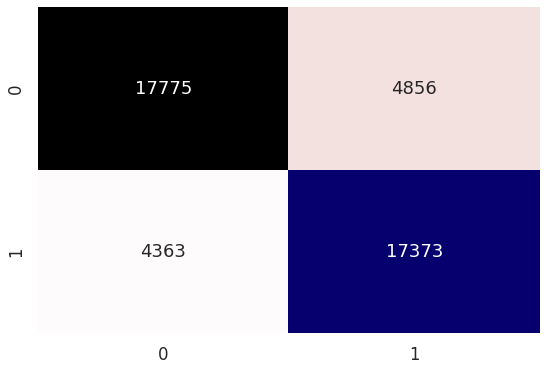

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     22631
           1       0.78      0.80      0.79     21736

    accuracy                           0.79     44367
   macro avg       0.79      0.79      0.79     44367
weighted avg       0.79      0.79      0.79     44367



In [ ]:
# prediction and visualization
pred_rf_grouped_uptake= my_model_rf_uptake.predict(X_test_uptake)
heatconmat(y_test_uptake,pred_rf_grouped_uptake)
print ('Random Forest testing Score: {0:2.5f}'.format(my_model_rf_uptake.score(X_test_uptake, y_test_uptake)))

In [ ]:
# Displaying the features importance of the model
perm = PermutationImportance(my_model_rf_uptake).fit(X_train_uptake, y_train_uptake)
eli5.show_weights(perm, feature_names = X_train_uptake.columns.tolist())

Weight,Feature
0.1740 ± 0.0008,normalized_BV421_A
0.0798 ± 0.0009,normalized_FITC_A
0.0638 ± 0.0010,normalized_PerCP_A
0.0321 ± 0.0006,normalized_PE_Texas_Red_A
0.0056 ± 0.0002,normalized_Alexa_Fluor_700_A


In [ ]:
# saving the model as a pickle
model_name = 'H460_groupkfold_single_rf_uptake'
pickle.dump(my_model_rf_uptake, open(data_path + model_name+'.pkl', 'wb'))

XGBoost

In [ ]:
# training the model and displaying its performance
xgboost_classification = XGBClassifier(n_jobs=-1)
my_model_xgboost_grouped_uptake = xgboost_classification.fit(X_train_uptake, y_train_uptake)

xgboost Score: 0.80830


In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(xgboost_classification, X_train_uptake, y_train_uptake, scoring='accuracy', cv=cv, n_jobs=-1)
print('Cross validation Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
print('xgboost training Score: {0:2.5f}'.format(my_model_xgboost_grouped_uptake.score(X_train_uptake, y_train_uptake)))

Accuracy: 80.396 (1.496)


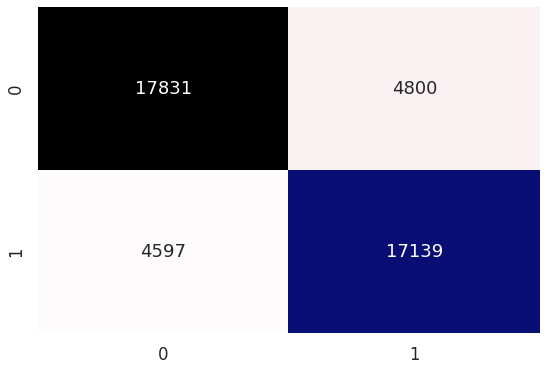

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     22631
           1       0.78      0.79      0.78     21736

    accuracy                           0.79     44367
   macro avg       0.79      0.79      0.79     44367
weighted avg       0.79      0.79      0.79     44367



In [ ]:
# prediction and visualization
pred_xgboost = my_model_xgboost_grouped_uptake.predict(X_test_uptake)
heatconmat(y_test_uptake,pred_xgboost)
print('xgboost testing Score: {0:2.5f}'.format(my_model_xgboost_grouped_uptake.score(X_test_uptake, y_test_uptake)))

In [ ]:
# Displaying the features importance of the model
perm_xgboost = PermutationImportance(my_model_xgboost_grouped_uptake, random_state=1).fit(X_train_uptake, y_train_uptake)
eli5.show_weights(perm_xgboost, feature_names = X_train_uptake.columns.tolist())

Weight,Feature
0.1933 ± 0.0015,normalized_BV421_A
0.0725 ± 0.0007,normalized_FITC_A
0.0564 ± 0.0010,normalized_PerCP_A
0.0159 ± 0.0009,normalized_Alexa_Fluor_700_A
0.0065 ± 0.0008,normalized_PE_Texas_Red_A


In [ ]:
# saving the model as a pickle
model_name = 'H460_groupkfold_single_xgboost_uptake'
pickle.dump(my_model_xgboost_grouped_uptake, open(data_path+ model_name+'.pkl', 'wb'))

SVM

In [ ]:
# training the model and displaying its performance
SVM_uptake = svm.SVC(kernel='linear')
my_model_SVM_grouped_uptake = SVM_uptake.fit(X_train_uptake, y_train_uptake)

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(SVM_uptake, X_train_uptake, y_train_uptake, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))
print ('SVM training Score: {0:2.5f}'.format(my_model_SVM_grouped_uptake.score(X_train_uptake, y_train_uptake)))

Accuracy: 71.430 (2.464)


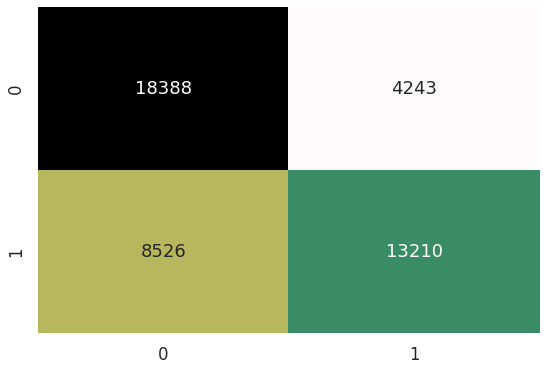

              precision    recall  f1-score   support

           0       0.68      0.81      0.74     22631
           1       0.76      0.61      0.67     21736

    accuracy                           0.71     44367
   macro avg       0.72      0.71      0.71     44367
weighted avg       0.72      0.71      0.71     44367



In [ ]:
# prediction and visualization
pred_SVM = my_model_SVM_grouped_uptake.predict(X_test_uptake)
heatconmat(y_test_uptake,pred_SVM)
print('SVM testing Score: {0:2.5f}'.format(my_model_SVM_grouped_uptake.score(X_test_uptake, y_test_uptake)))

In [ ]:
# Displaying the features importance of the model
perm_SVM = PermutationImportance(my_model_SVM_grouped_uptake, random_state=1).fit(X_train_uptake, y_train_uptake)
eli5.show_weights(perm_SVM, feature_names = X_train_uptake.columns.tolist())

In [ ]:
# saving the model as a pickle
model_name = 'H460_groupkfold_single_SVM_uptake'
pickle.dump(my_model_SVM_grouped_uptake, open(data_path+ model_name+'.pkl', 'wb'))

#models performance evaluation on new unseen data using the Batch dataset

In [ ]:
## opening the saved models

# RF
model_name = 'H460_groupkfold_single_rf_uptake'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_rf_uptake = pickle.load(a_file)
a_file.close()

# xgboost
model_name = 'H460_groupkfold_single_xgboost_uptake'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_xgboost_uptake = pickle.load(a_file)
a_file.close()

# SVM
model_name = 'H460_groupkfold_single_SVM_uptake'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_SVM_uptake = pickle.load(a_file)
a_file.close()

In [ ]:
# preparint the features and the target vector
cols_batch = [col for col in data_batch_uptake.columns if col not in ['Cell_line']]
population_data_batch_uptake = data_batch_uptake[cols_batch]
#assigning the labels column as target
target_batch = data_batch_uptake['Cell_line']

RF performance

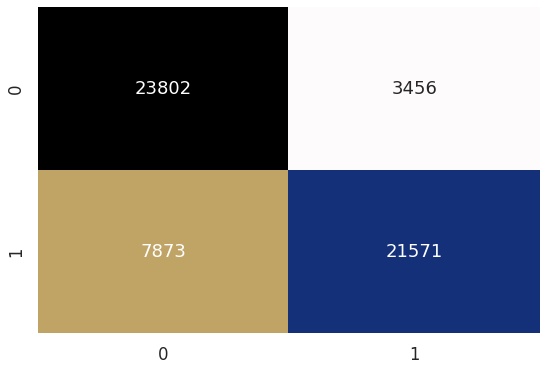

              precision    recall  f1-score   support

           0       0.75      0.87      0.81     27258
           1       0.86      0.73      0.79     29444

    accuracy                           0.80     56702
   macro avg       0.81      0.80      0.80     56702
weighted avg       0.81      0.80      0.80     56702



In [ ]:
pred_random_forest_uptake_batch = my_model_single_rf_uptake.predict(population_data_batch_uptake)
heatconmat(target_batch,pred_random_forest_uptake_batch)
accuracy = accuracy_score(pred_random_forest_uptake_batch.astype(int), target_batch.astype(int))
accuracy

XGBoost performance

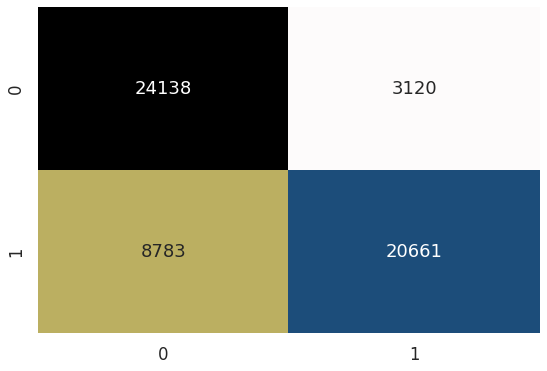

              precision    recall  f1-score   support

           0       0.73      0.89      0.80     27258
           1       0.87      0.70      0.78     29444

    accuracy                           0.79     56702
   macro avg       0.80      0.79      0.79     56702
weighted avg       0.80      0.79      0.79     56702



In [ ]:
pred_xgboost_uptake_batch = my_model_single_xgboost_uptake.predict(population_data_batch_uptake)
heatconmat(target_batch,pred_xgboost_uptake_batch)
accuracy = accuracy_score(pred_xgboost_uptake_batch.astype(int), target_batch.astype(int))
accuracy

SVM performance

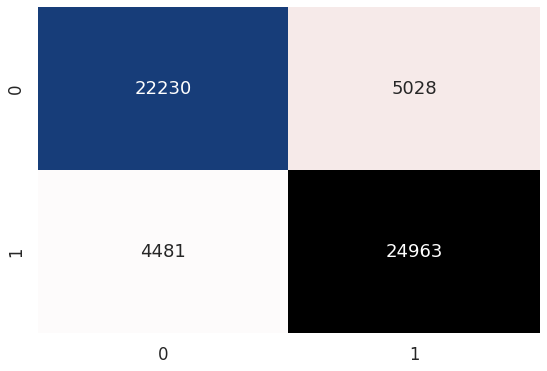

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     27258
           1       0.83      0.85      0.84     29444

    accuracy                           0.83     56702
   macro avg       0.83      0.83      0.83     56702
weighted avg       0.83      0.83      0.83     56702



In [ ]:
pred_batch_uptake_SVM = my_model_single_SVM_uptake.predict(population_data_batch_uptake)
heatconmat(target_batch,pred_batch_uptake_SVM)
accuracy = accuracy_score(pred_batch_uptake_SVM.astype(int), target_batch.astype(int))
accuracy

#Dimention reduction using principle component analysis -PCA

preparing the transformed data

In [ ]:
# rescaled data
train_data_rescaled = scaler.fit_transform(X_train_uptake)
test_data_rescaled = scaler.fit_transform(X_test_uptake)
batch_data_rescaled = scaler.fit_transform(population_data_batch_uptake)

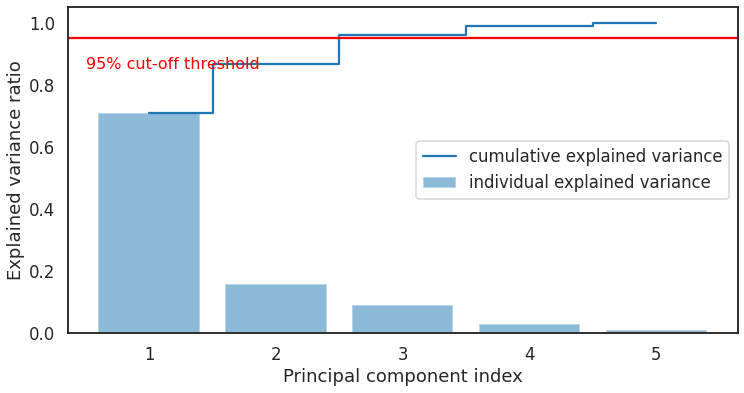

In [ ]:
# displaying the componantes and the data varience they includes for choosing the number of componnets to reduced to
cov_mat = np.cov(train_data_rescaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(range(1,6), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,6), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.legend(loc='best')
plt.show()

In [ ]:
pca_uptake = PCA(n_components=3)# choosing the number of dimentions

# fit and transform data
X_train_pca_uptake = pca_uptake.fit_transform(train_data_rescaled)
X_test_pca_uptake = pca_uptake.transform(test_data_rescaled)
X_batch_pca_uptake = pca_uptake.transform(batch_data_rescaled)


In [ ]:
# How much each original feature contribute to the components
print(pd.DataFrame(np.abs(pca_uptake.components_),columns=X_train_uptake.columns ,index = ['PC-1', 'PC-2', 'PC-3']))

      normalized_BV421_A  normalized_FITC_A  normalized_PE_Texas_Red_A  \
PC-1            0.209826           0.209345                   0.662348   
PC-2            0.232603           0.223971                   0.543688   
PC-3            0.640806           0.582129                   0.480997   

      normalized_Alexa_Fluor_700_A  normalized_PerCP_A  
PC-1                      0.600002            0.336808  
PC-2                      0.774249            0.025970  
PC-3                      0.027693            0.135532  


In [ ]:
# printing the most contributing original feature for each component
most_important = np.abs(pca_uptake.components_).argmax(axis=1)
initial_feature_names = X_train_uptake.columns
most_important_names = initial_feature_names[most_important]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(3)}
pca_results = pd.DataFrame(dic.items())
print(pca_results)

     0                             1
0  PC1     normalized_PE_Texas_Red_A
1  PC2  normalized_Alexa_Fluor_700_A
2  PC3            normalized_BV421_A


random forest

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_rf_PCA_uptake = my_model_single_rf_uptake.fit(X_train_pca_uptake, y_train_uptake)
print ('Random Forest Score: {0:2.5f}'.format(my_model_rf_PCA_uptake.score(X_test_pca_uptake, y_test_uptake)))

Random Forest Score: 0.72782


In [ ]:
# evaluating the model performance on the Batch data
pred_random_forest_uptake_PCA_batch = my_model_rf_PCA_uptake.predict(X_batch_pca_uptake)
accuracy = accuracy_score(pred_random_forest_uptake_PCA_batch.astype(int), target_batch.astype(int))
accuracy

0.827554583612571

XGBoost

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_xgboost_PCA_uptake = my_model_single_xgboost_uptake.fit(X_train_pca_uptake, y_train_uptake)

print ('xgboost Score: {0:2.5f}'.format(my_model_xgboost_PCA_uptake.score(X_test_pca_uptake, y_test_uptake)))

xgboost Score: 0.72378


In [ ]:
# evaluating the model performance on the Batch data
pred_xgboost_uptake_PCA_batch = my_model_xgboost_PCA_uptake.predict(X_batch_pca_uptake)
accuracy = accuracy_score(pred_xgboost_uptake_PCA_batch.astype(int), target_batch.astype(int))
accuracy

0.8324926810341787

SVM

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_SVM_PCA_uptake = my_model_single_SVM_uptake.fit(X_train_pca_uptake, y_train_uptake)

print ('xgboost Score: {0:2.5f}'.format(my_model_SVM_PCA_uptake.score(X_test_pca_uptake, y_test_uptake)))

xgboost Score: 0.70081


In [ ]:
# evaluating the model performance on the Batch data
pred_SVM_uptake_PCA_batch = my_model_SVM_PCA_uptake.predict(X_batch_pca_uptake)
accuracy = accuracy_score(pred_SVM_uptake_PCA_batch.astype(int), target_batch.astype(int))
accuracy

0.8535677753871116

# all data
The data contains the FSC, SSSC and the 5 particle uptake intensities values

In [ ]:
# preparing the data - filtering out the uptake features

# training and testing data
X_train_all = single_cell_data_train.drop(columns = ['BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A', 'index'], axis =1)
X_test_all = single_cell_data_test.drop(columns = ['BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A', 'index'], axis =1)

y_train_all = target_train
y_test_all = target_test

# spliting the data to testing and validation
X_test_all, X_val_all, y_test_all, y_val_all = train_test_split(X_test_all, y_test_all, test_size=0.5, random_state=42)

# Batch

All_data_batch_all = All_data_batch.drop(columns = ['BV421_A', 'FITC_A', 'PerCP_A', 'PE_Texas_Red_A', 'Alexa_Fluor_700_A'], axis =1)

Random forest

In [ ]:
# training the model and displaying its performance
random_forest_all = RandomForestClassifier(n_estimators=1000,n_jobs=-1,max_depth = 12)
my_model_rf_all = random_forest_all.fit(X_train_all,y_train_all)
display_classification_results(my_model_rf_all, X_train_all, y_train_all, X_val_all, y_val_all);

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(random_forest_all, X_train_all, y_train_all, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

# printing the model accuracy on the training dataset
print ('Random Forest training Score: {0:2.5f}'.format(my_model_rf_all.score(X_train_all, y_train_all)))

Accuracy: 92.552 (0.933)


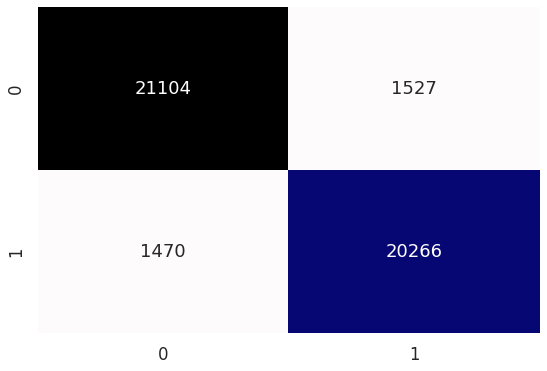

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     22631
           1       0.93      0.93      0.93     21736

    accuracy                           0.93     44367
   macro avg       0.93      0.93      0.93     44367
weighted avg       0.93      0.93      0.93     44367



In [ ]:
# prediction and visualization
pred_rf_grouped_all= my_model_rf_all.predict(X_test_all)
heatconmat(y_test_all,pred_rf_grouped_all)
print ('Random Forest testing Score: {0:2.5f}'.format(my_model_rf_all.score(X_test_all, y_test_all)))

In [ ]:
# Displaying the features importance of the model
perm = PermutationImportance(my_model_rf_all).fit(X_train_all, y_train_all)
eli5.show_weights(perm, feature_names = X_train_all.columns.tolist())

Weight,Feature
0.3406 ± 0.0017,SSC_A
0.2614 ± 0.0019,SSC_H
0.0376 ± 0.0008,normalized_PerCP_A
0.0325 ± 0.0007,FSC_A
0.0284 ± 0.0002,SSC_W
0.0184 ± 0.0002,normalized_PE_Texas_Red_A
0.0161 ± 0.0002,normalized_FITC_A
0.0114 ± 0.0002,FSC_H
0.0100 ± 0.0003,FSC_W
0.0056 ± 0.0002,normalized_BV421_A


In [ ]:
# saving the model as a pickle - need to assign the wanted chip name
model_name = 'H460_groupkfold_single_rf_all'
pickle.dump(my_model_rf_all, open(data_path+ model_name+'.pkl', 'wb'))

XGBoost

In [ ]:
# training the model and displaying its performance
xgboost_classification = XGBClassifier(n_jobs=-1)
my_model_xgboost_grouped_all = xgboost_classification.fit(X_train_all, y_train_all)

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(xgboost_classification, X_train_all, y_train_all, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

print ('xgboost Score: {0:2.5f}'.format(my_model_xgboost_grouped_all.score(X_train_all, y_train_all)))

Accuracy: 91.904 (0.877)


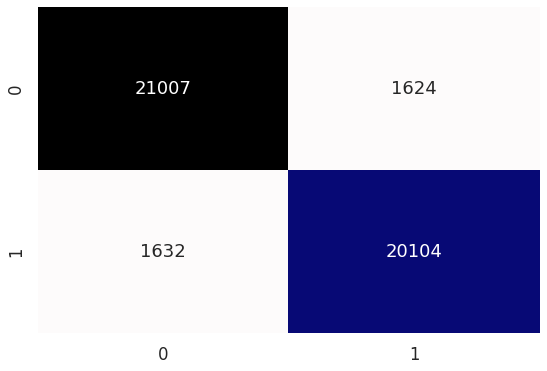

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     22631
           1       0.93      0.92      0.93     21736

    accuracy                           0.93     44367
   macro avg       0.93      0.93      0.93     44367
weighted avg       0.93      0.93      0.93     44367



In [ ]:
# prediction and visualization
pred_xgboost = my_model_xgboost_grouped_all.predict(X_test_all)
heatconmat(y_test_all,pred_xgboost)
print ('xgboost Score: {0:2.5f}'.format(my_model_xgboost_grouped_all.score(X_test_all, y_test_all)))

In [ ]:
# Displaying the features importance of the model
perm_xgboost = PermutationImportance(my_model_xgboost_grouped_all, random_state=1).fit(X_train_all, y_train_all)
eli5.show_weights(perm_xgboost, feature_names = X_train_all.columns.tolist())

Weight,Feature
0.3543 ± 0.0013,SSC_A
0.1581 ± 0.0008,SSC_H
0.0380 ± 0.0006,FSC_A
0.0363 ± 0.0008,normalized_PerCP_A
0.0152 ± 0.0005,SSC_W
0.0120 ± 0.0005,normalized_FITC_A
0.0059 ± 0.0003,FSC_W
0.0049 ± 0.0004,normalized_PE_Texas_Red_A
0.0031 ± 0.0004,normalized_BV421_A
0.0004 ± 0.0001,FSC_H


In [ ]:
# saving the model as a pickle - need to assign the wanted chip name
model_name = 'H460_groupkfold_single_xgboost_all'
pickle.dump(my_model_xgboost_grouped_all, open(data_path+ model_name+'.pkl', 'wb'))

SVM

In [ ]:
# training the model and displaying its performance
SVM_all = svm.SVC(kernel='linear')
my_model_SVM_grouped_all = SVM_all.fit(X_train_all, y_train_all)

In [ ]:
# evaluating the model accuracy using cross validation
scores = cross_val_score(SVM_all, X_train_all, y_train_all, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

print ('SVM Score: {0:2.5f}'.format(my_model_SVM_grouped_all.score(X_train_all, y_train_all)))

Accuracy: 91.250 (1.001)


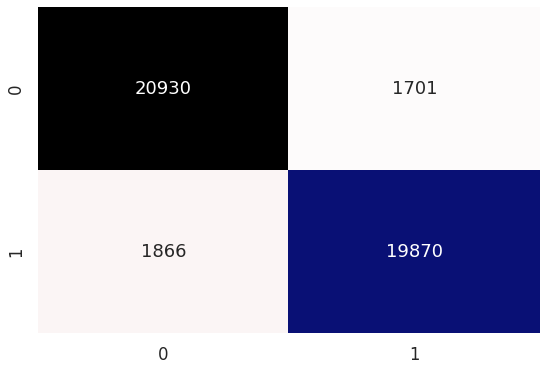

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     22631
           1       0.92      0.91      0.92     21736

    accuracy                           0.92     44367
   macro avg       0.92      0.92      0.92     44367
weighted avg       0.92      0.92      0.92     44367



In [ ]:
# prediction and visualization
pred_SVM = my_model_SVM_grouped_all.predict(X_test_all)
heatconmat(y_test_all,pred_SVM)
print('SVM Score: {0:2.5f}'.format(my_model_SVM_grouped_all.score(X_test_all, y_test_all)))

In [ ]:
# Displaying the features importance of the model
perm_SVM = PermutationImportance(my_model_SVM_grouped_all, random_state=1).fit(X_train_all, y_train_all)
eli5.show_weights(perm_SVM, feature_names = X_train_all.columns.tolist())

In [ ]:
# saving the model as a pickle - need to assign the wanted chip name
model_name = 'H460_groupkfold_single_SVM_all'
pickle.dump(my_model_SVM_grouped_all, open(data_path+ model_name+'.pkl', 'wb'))

#models performance evaluation on new unseen data using the Batch dataset


In [ ]:
## opening the saved models

# RF
model_name = 'H460_groupkfold_single_rf_all'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_rf_all = pickle.load(a_file)
a_file.close()

# xgboost
model_name = 'H460_groupkfold_single_xgboost_all'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_xgboost_all = pickle.load(a_file)
a_file.close()

# SVM
model_name = 'H460_groupkfold_single_SVM_all'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_SVM_all = pickle.load(a_file)
a_file.close()

In [ ]:
# preparint the features and the target vector
cols_batch = [col for col in All_data_batch_all.columns if col not in ['Cell_line']]
population_data_batch_all = All_data_batch_all[cols_batch]
#assigning the labels column as target
target_batch = All_data_batch_all['Cell_line']

Random forest

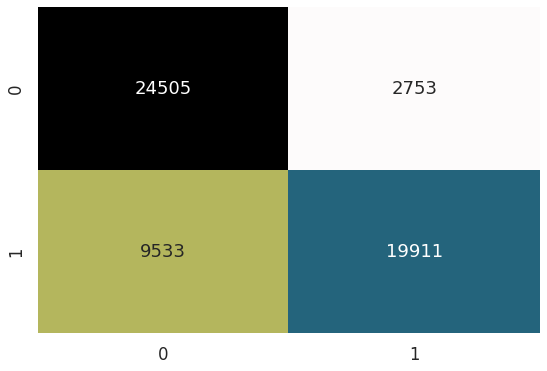

              precision    recall  f1-score   support

           0       0.72      0.90      0.80     27258
           1       0.88      0.68      0.76     29444

    accuracy                           0.78     56702
   macro avg       0.80      0.79      0.78     56702
weighted avg       0.80      0.78      0.78     56702



In [ ]:
pred_random_forest_all_batch = my_model_single_rf_all.predict(population_data_batch_all)
heatconmat(target_batch,pred_random_forest_all_batch)
accuracy = accuracy_score(pred_random_forest_all_batch.astype(int), target_batch.astype(int))
accuracy

XGBoost

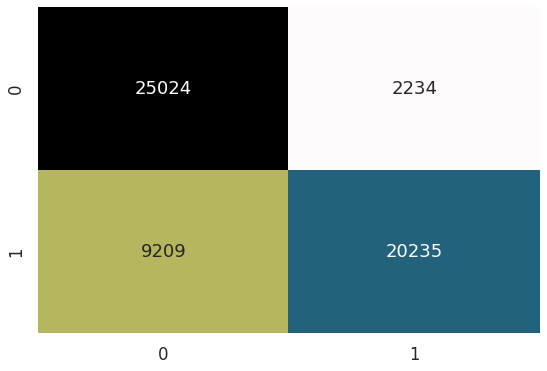

              precision    recall  f1-score   support

           0       0.73      0.92      0.81     27258
           1       0.90      0.69      0.78     29444

    accuracy                           0.80     56702
   macro avg       0.82      0.80      0.80     56702
weighted avg       0.82      0.80      0.80     56702



In [ ]:
pred_xgboost_all_batch = my_model_single_xgboost_all.predict(population_data_batch_all)
heatconmat(target_batch,pred_xgboost_all_batch)
accuracy = accuracy_score(pred_xgboost_all_batch.astype(int), target_batch.astype(int))
accuracy

SVM

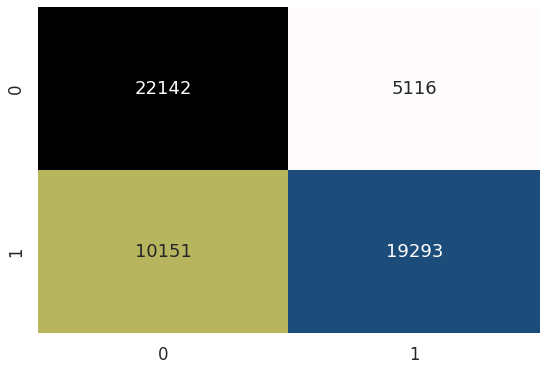

              precision    recall  f1-score   support

           0       0.69      0.81      0.74     27258
           1       0.79      0.66      0.72     29444

    accuracy                           0.73     56702
   macro avg       0.74      0.73      0.73     56702
weighted avg       0.74      0.73      0.73     56702



In [ ]:
pred_batch_all_SVM = my_model_single_SVM_all.predict(population_data_batch_all)
heatconmat(target_batch,pred_batch_all_SVM)
accuracy = accuracy_score(pred_batch_all_SVM.astype(int), target_batch.astype(int))
accuracy

#Dimention reduction using principle component analysis -PCA

preparing the transformed data

In [ ]:
# rescaling the data
train_data_rescaled = scaler.fit_transform(X_train_all)
test_data_rescaled = scaler.fit_transform(X_test_all)
batch_data_rescaled = scaler.fit_transform(population_data_batch_all)

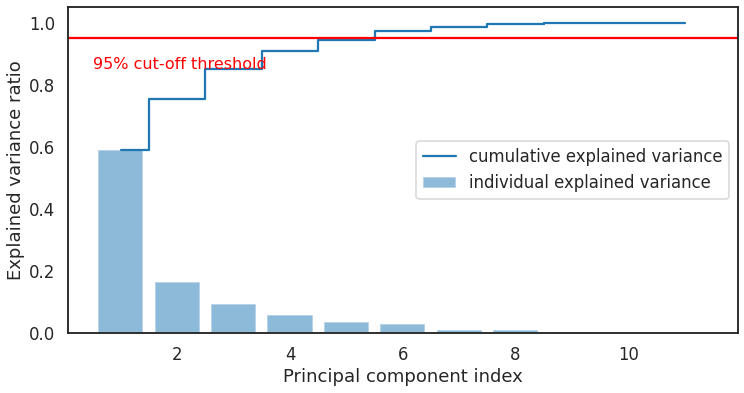

In [ ]:
# displaying the componantes and the data varience they includes for choosing the number of componnets to reduced to
cov_mat = np.cov(train_data_rescaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(range(1,12), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,12), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.legend(loc='best')
plt.show()

In [ ]:
pca_all = PCA(n_components=6)# choosing the number of dimentions

# fit and transform data
X_train_pca_all = pca_all.fit_transform(train_data_rescaled)
X_test_pca_all = pca_all.transform(test_data_rescaled)
X_batch_pca_all = pca_all.transform(batch_data_rescaled)


In [ ]:
# How much each original feature contribute to the components
print(pd.DataFrame(np.abs(pca_all.components_),columns=X_train_all.columns ,index = ['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6']))

         FSC_A     FSC_H     FSC_W     SSC_A     SSC_H     SSC_W  \
PC-1  0.214559  0.202998  0.130190  0.537400  0.436926  0.175334   
PC-2  0.445834  0.487964  0.136856  0.192526  0.094088  0.227627   
PC-3  0.352497  0.515605  0.153952  0.299675  0.139343  0.372931   
PC-4  0.093573  0.183113  0.134185  0.154632  0.038557  0.280331   
PC-5  0.025709  0.112369  0.291601  0.003547  0.166164  0.429356   
PC-6  0.202379  0.097404  0.312627  0.341459  0.483091  0.430258   

      normalized_BV421_A  normalized_FITC_A  normalized_PE_Texas_Red_A  \
PC-1            0.168650           0.148060                   0.419891   
PC-2            0.044820           0.092942                   0.396663   
PC-3            0.194167           0.151795                   0.003925   
PC-4            0.020193           0.033000                   0.711789   
PC-5            0.547434           0.514176                   0.325749   
PC-6            0.266174           0.441716                   0.107736   

    

In [ ]:
# printing the most contributing original feature for each component
most_important = np.abs(pca_all.components_).argmax(axis=1)
initial_feature_names = X_train_all.columns
most_important_names = initial_feature_names[most_important]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(6)}
pca_results = pd.DataFrame(dic.items())
print(pca_results)

     0                             1
0  PC1                         SSC_A
1  PC2                         FSC_H
2  PC3  normalized_Alexa_Fluor_700_A
3  PC4     normalized_PE_Texas_Red_A
4  PC5            normalized_BV421_A
5  PC6                         SSC_H


random forest

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_rf_PCA_all = random_forest_all.fit(X_train_pca_all, y_train_all)
print ('Random Forest Score: {0:2.5f}'.format(my_model_rf_PCA_all.score(X_test_pca_all, y_test_all)))

Random Forest Score: 0.91313


In [ ]:
# evaluating the model performance on the Batch data
pred_random_forest_all_PCA_batch = my_model_rf_PCA_all.predict(X_batch_pca_all)
accuracy = accuracy_score(pred_random_forest_all_PCA_batch.astype(int), target_batch.astype(int))
accuracy

0.7433247504497196

XGBoost

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_xgboost_PCA_all = xgboost_classification.fit(X_train_pca_all, y_train_all)
print ('xgboost Score: {0:2.5f}'.format(my_model_xgboost_PCA_all.score(X_test_pca_all, y_test_all)))

xgboost Score: 0.90905


In [ ]:
# evaluating the model performance on the Batch data
pred_xgboost_all_PCA_batch = my_model_xgboost_PCA_all.predict(X_batch_pca_all)
accuracy = accuracy_score(pred_xgboost_all_PCA_batch.astype(int), target_batch.astype(int))
accuracy

0.8060562237663574

SVM

In [ ]:
# training the model and evaluating its performance on the testing data
my_model_SVM_PCA_all = SVM_all.fit(X_train_pca_all, y_train_all)
print ('xgboost Score: {0:2.5f}'.format(my_model_SVM_PCA_all.score(X_test_pca_all, y_test_all)))

xgboost Score: 0.89914


In [ ]:
# evaluating the model performance on the Batch data
pred_SVM_all_PCA_batch = my_model_SVM_PCA_all.predict(X_batch_pca_all)
accuracy = accuracy_score(pred_SVM_all_PCA_batch.astype(int), target_batch.astype(int))
accuracy

0.7415611442277168

We calculated the p-value between the All and physiological models. In this analysis, we computed the differences between the probabilities and the true value. As the probability approaches the true value, the difference tends to zero. Than we apply the t-test on the residuals.


In [ ]:
# opening the saved models

model_name = 'H460_groupkfold_single_rf_phys'
a_file = open(data_path+model_name+'.pkl', "rb")
my_model_single_rf_phys = pickle.load(a_file)
a_file.close()

In [ ]:
# t-test analysis between models using the probabity prediction of each sample
import scipy.stats as stats

prob_df_phys= pd.DataFrame()
prob_df_all= pd.DataFrame()

prob_phys = my_model_single_rf_phys.predict_proba(X_test_phys)[:,1]# getting the probabilities of the physiological based analysis
prob_all = my_model_single_rf_all.predict_proba(X_test_all)[:,1]# getting the probabilities of the all features based analysis

# adding the probabilities to the dataframes
prob_df_phys['probs_phys'], prob_df_phys['True_phys'] = prob_phys, y_test_phys
prob_df_all['probs_all'], prob_df_all['True_all'] = prob_all, y_test_all

# calculating the distance between the probability to the label value (0 or 1)
prob_res_phys = abs(prob_phys - y_test_phys)
prob_res_all = abs(prob_all - y_test_all)

prob_res_phys = prob_res_phys.reset_index()
prob_res_all = prob_res_all.reset_index()

# perform the t-test on the distances
t_stat, p_value = stats.ttest_ind(prob_res_phys, prob_res_all)
print (t_stat, p_value)

## ROC curve

ROC curve and AUC values calculation between the different features-based random forest and XGBoost models

In [ ]:
## opening the saved models

# RF
model_name = 'H460_groupkfold_single_rf_phys_no_nps'
a_file = open('/content/drive/MyDrive/H460/'+model_name+'.pkl', "rb")
my_model_single_rf_phys_no_nps = pickle.load(a_file)
a_file.close()

# xgboost
model_name = 'H460_groupkfold_single_xgboost_phys_no_nps'
a_file = open('/content/drive/MyDrive/H460/'+model_name+'.pkl', "rb")
my_model_single_xgboost_phys_no_nps = pickle.load(a_file)
a_file.close()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:28:28] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generat

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics
sns.set_style('white')

In [ ]:
# preparing the data
X_test_single_no_nps = pd.read_csv(data_path + 'X_test_single_no_nps.csv')
y_test_single_no_nps = pd.read_csv(data_path + 'y_test_single_no_nps.csv')

X_test_single_no_nps.drop('Unnamed: 0', axis = 1, inplace = True)
y_test_single_no_nps.drop('Unnamed: 0', axis = 1, inplace = True)

Random forest

In [ ]:
# getting the probabilities (testing data)
pred_prob_1 = my_model_single_rf_phys_no_bins.predict_proba(X_test_phys)
pred_prob_2 = my_model_single_rf_uptake.predict_proba(X_test_uptake)
pred_prob_3 = my_model_single_rf_all.predict_proba(X_test_all)
pred_prob_4 = my_model_single_rf_phys_no_nps.predict_proba(X_test_single_no_nps)

NameError: name 'my_model_single_rf_phys_no_bins' is not defined

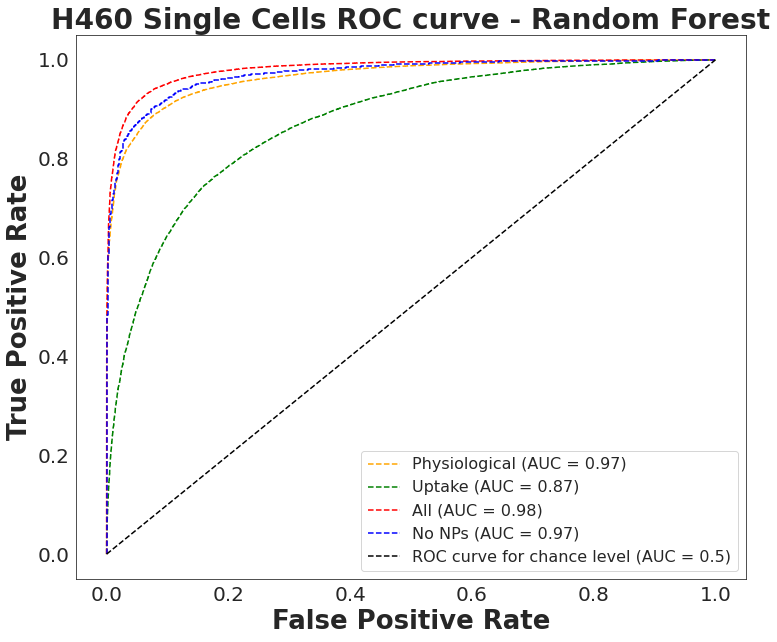

In [ ]:
# ploting Roc curve

fig, ax = plt.subplots(figsize=(12,10))

false_positive_rate_1, true_positive_rate_1, threshold_1 = roc_curve(y_test_phys, pred_prob_1[:,0], pos_label = 0)
false_positive_rate_2, true_positive_rate_2, threshold_2 = roc_curve(y_test_uptake, pred_prob_2[:,0], pos_label = 0)
false_positive_rate_3, true_positive_rate_3, threshold_3 = roc_curve(y_test_all, pred_prob_3[:,0], pos_label = 0)
false_positive_rate_4, true_positive_rate_4, threshold_4 = roc_curve(y_test_single_no_nps, pred_prob_4[:,0], pos_label = 0)

#AUC
auc_1 = metrics.roc_auc_score(y_test_phys, pred_prob_1[:,1])
auc_2 = metrics.roc_auc_score(y_test_uptake, pred_prob_2[:,1])
auc_3 = metrics.roc_auc_score(y_test_all, pred_prob_3[:,1])
auc_4 = metrics.roc_auc_score(y_test_single_no_nps, pred_prob_4[:,1])


# plot roc curves
plt.plot(false_positive_rate_1, true_positive_rate_1, linestyle='--',color='orange', label='Physiological (AUC = %0.2f)' % auc_1)
plt.plot(false_positive_rate_2, true_positive_rate_2, linestyle='--',color='green', label='Uptake (AUC = %0.2f)' % auc_2)
plt.plot(false_positive_rate_3, true_positive_rate_3, linestyle='--',color='red', label='All (AUC = %0.2f)' % auc_3)
plt.plot(false_positive_rate_4, true_positive_rate_4, linestyle='--',color='blue', label='No NPs (AUC = %0.2f)' % auc_4)

plt.plot([0, 1], ls="--", color = 'black', label = 'ROC curve for chance level (AUC = 0.5)')
# title
plt.title('H460 Single Cells ROC curve - Random Forest', size = 28, weight = 'bold')
# x label
plt.xlabel('False Positive Rate', size = 26, weight = 'bold')
# y label
plt.ylabel('True Positive Rate', size = 26, weight = 'bold')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(loc='lower right', fontsize = 16)
plt.savefig(data_path +'H460_RF_single_ROC',dpi=300)
plt.show();

XGBoost

In [ ]:
# getting the probabilities (testing data)
pred_prob_4 = my_model_single_xgboost_phys_no_bins.predict_proba(X_test_phys)
pred_prob_5 = my_model_single_xgboost_uptake.predict_proba(X_test_uptake)
pred_prob_6 = my_model_single_xgboost_all.predict_proba(X_test_all)
pred_prob_7 = my_model_single_xgboost_phys_no_nps.predict_proba(X_test_single_no_nps)

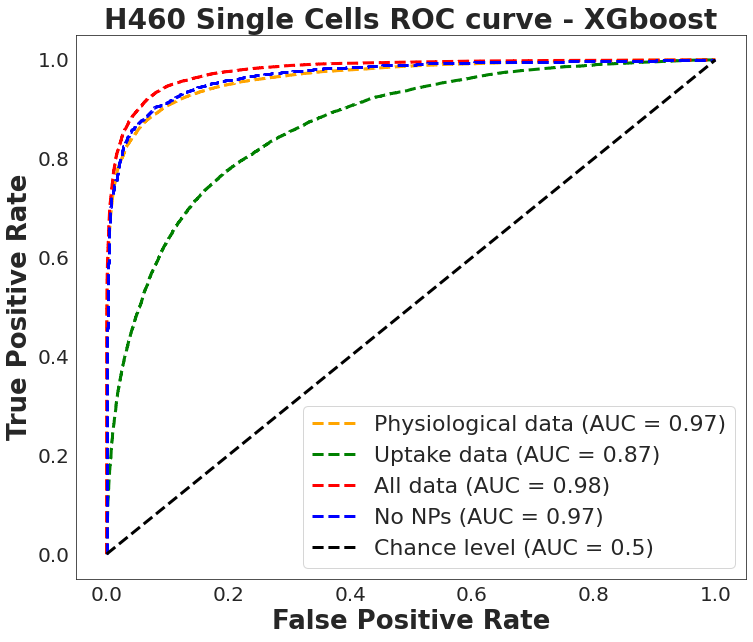

In [ ]:
# ploting Roc curve
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,10))

false_positive_rate_4, true_positive_rate_4, threshold_4 = roc_curve(y_test_phys, pred_prob_4[:,0], pos_label = 0)
false_positive_rate_5, true_positive_rate_5, threshold_5 = roc_curve(y_test_uptake, pred_prob_5[:,0], pos_label = 0)
false_positive_rate_6, true_positive_rate_6, threshold_6 = roc_curve(y_test_all, pred_prob_6[:,0], pos_label = 0)
false_positive_rate_7, true_positive_rate_7, threshold_7 = roc_curve(y_test_single_no_nps, pred_prob_7[:,0], pos_label = 0)

auc_4 = metrics.roc_auc_score(y_test_phys, pred_prob_4[:,1])
auc_5 = metrics.roc_auc_score(y_test_uptake, pred_prob_5[:,1])
auc_6 = metrics.roc_auc_score(y_test_all, pred_prob_6[:,1])
auc_7 = metrics.roc_auc_score(y_test_single_no_nps, pred_prob_7[:,1])

# plot roc curves
plt.plot(false_positive_rate_4, true_positive_rate_4, linestyle='--',linewidth = 3, color='orange', label='Physiological data (AUC = %0.2f)' % auc_4)
plt.plot(false_positive_rate_5, true_positive_rate_5, linestyle='--',linewidth = 3,color='green', label='Uptake data (AUC = %0.2f)' % auc_5)
plt.plot(false_positive_rate_6, true_positive_rate_6, linestyle='--',linewidth = 3,color='red', label='All data (AUC = %0.2f)' % auc_6)
plt.plot(false_positive_rate_7, true_positive_rate_7, linestyle='--',linewidth = 3,color='blue', label='No NPs (AUC = %0.2f)'% auc_7)

plt.plot([0, 1], ls="--", color = 'black', linewidth = 3, label = 'Chance level (AUC = 0.5)')
# title
plt.title('H460 Single Cells ROC curve - XGboost', size = 28, weight = 'bold')
# x label
plt.xlabel('False Positive Rate', size = 26, weight = 'bold')
# y label
plt.ylabel('True Positive Rate', size = 26, weight = 'bold')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(loc='lower right', fontsize = 22)

plt.savefig(data_path +'H460_XGboost_single_ROC',dpi=300)
plt.show();